In [1]:
# Find whether the sale is on Holiday or not (CLASSIFICATION problem)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [3]:
# reading data

df = pd.read_csv('Walmart.csv')

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
#scaler = StandardScaler()
#df= df.drop('Date',axis=1)

#df_norm = scaler.fit_transform(df)

In [9]:
#df_norm = pd.DataFrame(df_norm)

In [10]:
#plt.figure(figsize=(10,6),dpi=150)
#sns.heatmap(df_norm.corr(),annot=True)

In [11]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [12]:
df['Date'][0][-4:]

'2010'

In [13]:
def my_month(date):
    month = date[3:5]
    return month

def my_year(date):
    year = date[-4:]
    return year

In [14]:
df['Month'] = df['Date'].apply(my_month)
df['Year'] = df['Date'].apply(my_year)

In [15]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010


In [16]:
## we can use lambda function to separate Month and Year from 'Date'

# df['Month'] = df['Date'].apply(lambda x: x[3:5])
# df['Year'] = df['Date'].apply(lambda x: x[-4:])

In [17]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010


In [18]:
# drop the Date column

df = df.drop('Date',axis=1)

In [19]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010


<AxesSubplot:>

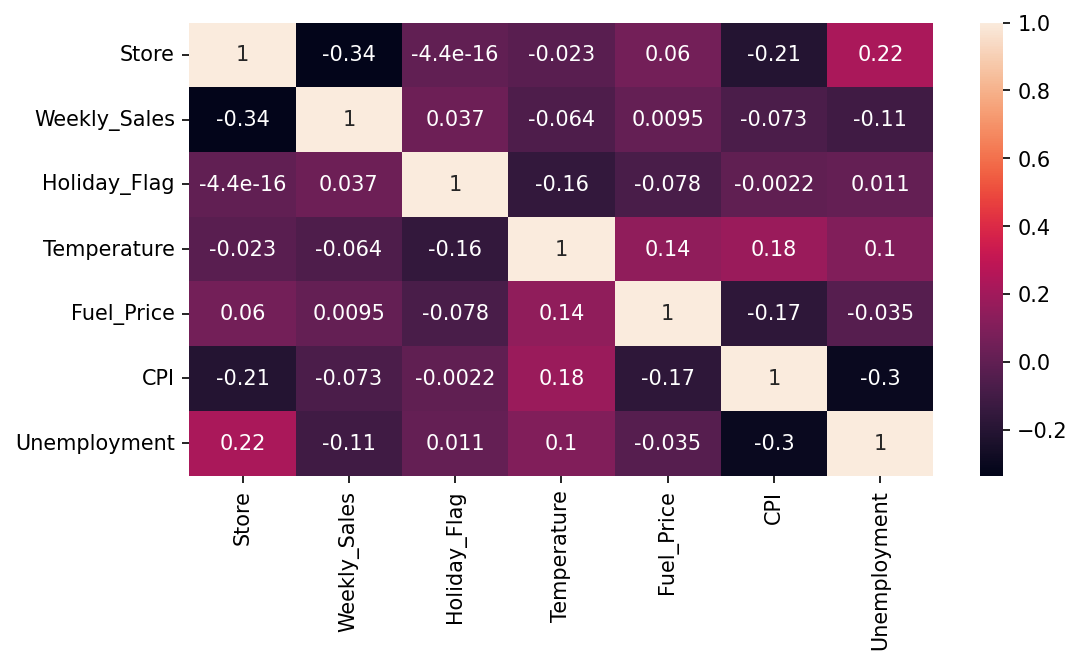

In [20]:


plt.figure(figsize=(8,4),dpi=150)
sns.heatmap(df.corr(),annot=True)

In [21]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010


In [22]:
def one_shot_encoding(df,column,prefix):
    newcols = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df,newcols],axis=1)
    df = df.drop(column,axis=1)
    return df

In [23]:
df = one_shot_encoding(df,column = 'Store',prefix = 'store')

# we will do one_shot_encoding for Month and year also

In [24]:
df = one_shot_encoding(df,column = 'Month',prefix = 'month')



In [25]:
df = one_shot_encoding(df,column = 'Year',prefix='')

In [26]:
df.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,store_1,store_2,store_3,store_4,...,month_06,month_07,month_08,month_09,month_10,month_11,month_12,_2010,_2011,_2012
0,1643690.90,0,42.31,2.572,211.096358,8.106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'store_1', 'store_2', 'store_3', 'store_4', 'store_5',
       'store_6', 'store_7', 'store_8', 'store_9', 'store_10', 'store_11',
       'store_12', 'store_13', 'store_14', 'store_15', 'store_16', 'store_17',
       'store_18', 'store_19', 'store_20', 'store_21', 'store_22', 'store_23',
       'store_24', 'store_25', 'store_26', 'store_27', 'store_28', 'store_29',
       'store_30', 'store_31', 'store_32', 'store_33', 'store_34', 'store_35',
       'store_36', 'store_37', 'store_38', 'store_39', 'store_40', 'store_41',
       'store_42', 'store_43', 'store_44', 'store_45', 'month_01', 'month_02',
       'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
       'month_09', 'month_10', 'month_11', 'month_12', '_2010', '_2011',
       '_2012'],
      dtype='object')

In [28]:
# Splitting and scaling the data

In [29]:
X = df.drop('Holiday_Flag',axis=1)

y = df['Holiday_Flag']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [32]:
# LOGISTIC REGRESSION- base model

In [33]:
log_model = LogisticRegression()

In [34]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [35]:
y_preds_log = log_model.predict(scaled_X_test)

In [36]:
accuracy_logistic_regression = accuracy_score(y_test,y_preds_log)

In [37]:
accuracy_logistic_regression

0.9228379078197825

In [38]:
# lets optimize hyper parameters using GridSearchCV now

In [39]:
# LOGISTIC REGRESSION- GIRDSEARCHCV

In [40]:
log_model_base = LogisticRegression(max_iter=1000000)

In [41]:
penalty = ['l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
l1_ratio = [.1,.5,.7,.9,.95,.99,1]

param_grid = {'penalty':penalty, 'solver':solver,'l1_ratio':l1_ratio}

In [42]:
log_model_grid = GridSearchCV(log_model_base,param_grid)

In [43]:
log_model_grid.fit(scaled_X_train,y_train)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=1000000),
             param_grid={'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [44]:
log_model_grid.best_params_

{'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [45]:
log_model_grid_final = LogisticRegression(l1_ratio=0.1, solver='liblinear')

In [46]:
log_model_grid_final.fit(scaled_X_train,y_train)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(l1_ratio=0.1, solver='liblinear')

In [47]:
y_pred_log_grid = log_model_grid_final.predict(scaled_X_test)

In [48]:
accuracy_logistic_regression_optimim = accuracy_score(y_test, y_pred_log_grid)
print(accuracy_logistic_regression_optimim)

0.9228379078197825


In [49]:
# no improvement in the accuracy using gridsearchcv

In [50]:
# SVM

In [51]:
svm_model = SVC()

In [52]:
svm_model.fit(scaled_X_train,y_train)

SVC()

In [53]:
y_pred_svm = svm_model.predict(scaled_X_test)

In [54]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
accuracy_svm

0.923873640600725

In [55]:
# DECISION TREES

In [56]:
dt_model = DecisionTreeClassifier()

In [57]:
dt_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred_dt = dt_model.predict(scaled_X_test)

In [59]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.9419989642672191

In [60]:
# RANDOM FORESTS is not performing well

In [61]:
rf_model = RandomForestClassifier()

In [62]:
rf_model.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred_rf = rf_model.predict(scaled_X_test)

In [64]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.9326773692387365

In [65]:
# random forest grid

In [66]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators, 'max_features':max_features,
             'bootstrap':bootstrap,'oob_score':oob_score}

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc,param_grid)
rfc_grid.fit(X_train,y_train)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [67]:
rfc_grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 100, 'oob_score': True}

In [68]:
rfc_grid_final = RandomForestClassifier(bootstrap=True, max_features=4, n_estimators=200, oob_score=False)

In [69]:
rfc_grid_final.fit(scaled_X_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=200)

In [70]:
y_pred_rf_grid = rfc_grid_final.predict(scaled_X_test)

In [71]:
accuracy_rf_grid = accuracy_score(y_test, y_pred_rf_grid)
accuracy_rf_grid

0.9249093733816676

In [72]:
# performance of random forest is not good compared to decision trees

In [73]:
print("Logistic Regression Accuracy:", accuracy_logistic_regression)
print("                SVM Accuracy:", accuracy_svm)
print("     Decision Trees Accuracy:", accuracy_dt)

Logistic Regression Accuracy: 0.9228379078197825
                SVM Accuracy: 0.923873640600725
     Decision Trees Accuracy: 0.9419989642672191
